In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [98]:
df=pd.read_csv("C:\\Users\\esrao\\OneDrive\\Masaüstü\\CarPredict\\Audi_A1_listings.csv")

In [99]:
df.head(3)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642


In [100]:
df=df.drop(columns=["index","href","PriceRank","MileageRank","PPYRank","Score","PriceRank"])

In [101]:
df.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.9+ KB


In [103]:
# Regression Formula => y=ax+b

In [104]:
df['Engine']=df['Engine'].str.replace("L","")

In [105]:
df['Engine']=pd.to_numeric(df['Engine'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    float64
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 36.9+ KB


In [107]:
df.head()

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667
3,2014.0,Hatchback,86000.0,1.6,103.550296,Manual,Diesel,3,7490.0,3745.000000
4,2014.0,Hatchback,104310.0,1.6,103.550296,Manual,Diesel,3,7400.0,3700.000000


In [108]:
df=pd.get_dummies(df,columns=["Type","Transmission","Fuel"])

In [109]:
df.head()

,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price(£),PPY,Type_Hatchback,Transmission_Automatic,Transmission_Manual,Fuel_Diesel,Fuel_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,True,False,True,True,False
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,True,False,True,False,True
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,True,False,True,False,True
3,2014.0,86000.0,1.6,103.550296,3,7490.0,3745.000000,True,False,True,True,False
4,2014.0,104310.0,1.6,103.550296,3,7400.0,3700.000000,True,False,True,True,False


In [110]:
print(df.isnull().sum())

Year                      0
Mileage(miles)            0
Engine                    0
PS                        0
Number_of_Owners          0
Price(£)                  0
PPY                       0
Type_Hatchback            0
Transmission_Automatic    0
Transmission_Manual       0
Fuel_Diesel               0
Fuel_Petrol               0
dtype: int64


In [111]:
# Price ile diğer değişkenlerin ilişkisini anlamak için korelasyon matrisi oluşturmak 

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

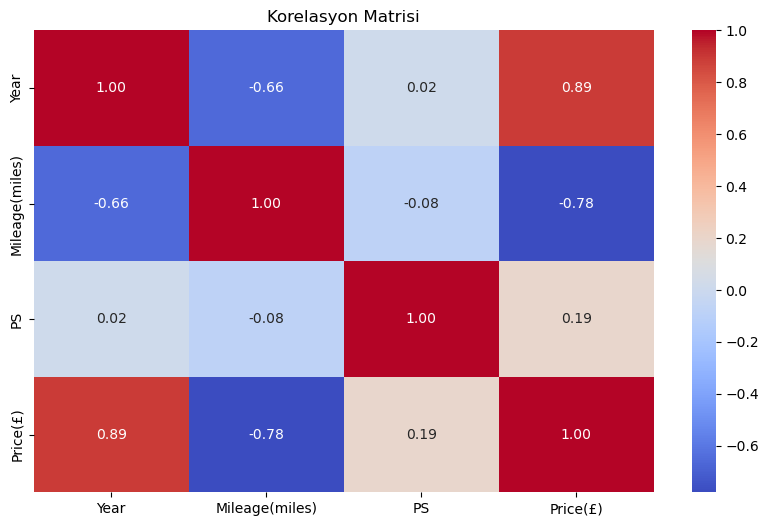

In [113]:
# Korelasyon matrisini hesaplama
correlation_matrix = df[['Year', 'Mileage(miles)', 'PS', 'Price(£)']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

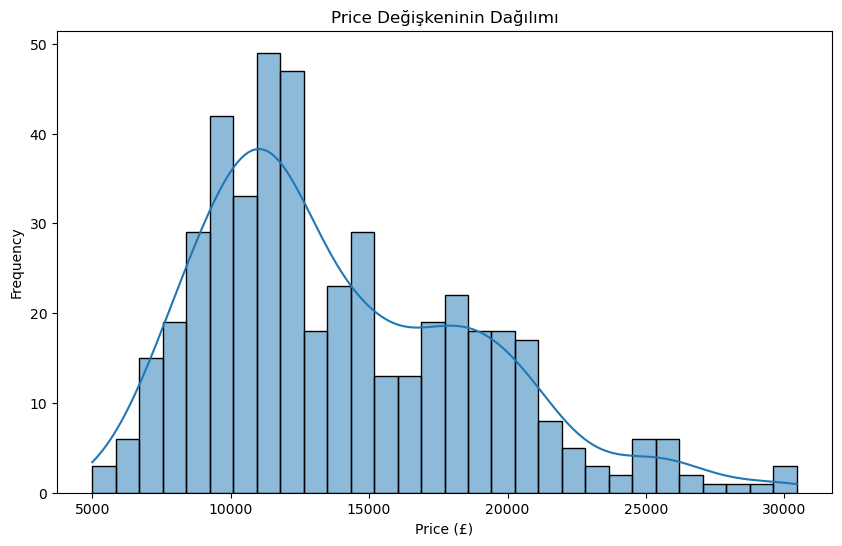

In [114]:
# Price dağılımını incelemek için histogram ve KDE grafiği
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(£)'], bins=30, kde=True)
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.title("Price Değişkeninin Dağılımı")
plt.show()

In [115]:
y=df[['Price(£)']]
x=df.drop("Price(£)",axis=1)

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)

In [117]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)
model.score(x_test,y_test)

0.9573837666604922

In [118]:
model.predict([[2017,50000,1.6,120,1,2500,220,300,800,0,1]])

C:\Users\esrao\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-219976.94220876]])